In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
colunas = ['ID_do_usuário' , 'ID_do_filme' , 'classificação' , 'timestamp']

df_ranking = pd.read_csv('Dados/filmesranking.txt', header=None, names=colunas, sep='\t')
df_filmes = pd.read_csv('Dados/idfilmestitulos.txt')

In [3]:
df_ranking['timestamp'] = pd.to_datetime(df_ranking['timestamp'], unit='s')
df_ranking.sort_values(by='ID_do_filme', inplace=True)

df_ranking.head(10)

,ID_do_usuário,ID_do_filme,classificação,timestamp
57284,554,1,3,1997-10-07 13:45:38
57582,790,1,3,1998-01-10 19:41:46
19044,396,1,4,1998-01-12 23:05:46
57252,807,1,4,1998-04-14 04:30:31
3414,232,1,4,1997-11-20 21:45:02
19311,339,1,5,1998-03-27 20:59:09
56863,634,1,3,1997-10-01 18:01:12
18953,160,1,4,1997-10-13 18:40:25
56672,761,1,1,1997-10-07 02:08:14
56499,134,1,5,1998-04-04 23:32:36


In [4]:
df_filmes.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
df = pd.merge(df_ranking, df_filmes, left_on='ID_do_filme', right_on='item_id')
df.drop(columns=['item_id'], inplace=True)
df.head()

,ID_do_usuário,ID_do_filme,classificação,timestamp,title
0,554,1,3,1997-10-07 13:45:38,Toy Story (1995)
1,790,1,3,1998-01-10 19:41:46,Toy Story (1995)
2,396,1,4,1998-01-12 23:05:46,Toy Story (1995)
3,807,1,4,1998-04-14 04:30:31,Toy Story (1995)
4,232,1,4,1997-11-20 21:45:02,Toy Story (1995)


<Axes: >

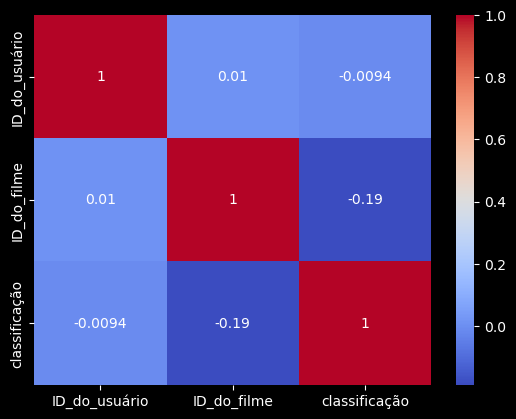

In [12]:
df_numerico = df.select_dtypes(include=['float64', 'int64'])

sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm')

In [10]:
ratings = df.groupby('title').agg({'classificação': ['mean', 'count']})
top_10_filmes = ratings.sort_values(by=('classificação', 'mean'), ascending=False).head(10)
top_10_filmes

classificação      
                                                           mean count
title                                                                
They Made Me a Criminal (1939)                              5.0     1
Marlene Dietrich: Shadow and Light (1996)                   5.0     1
Saint of Fort Washington, The (1993)                        5.0     2
Someone Else's America (1995)                               5.0     1
Star Kid (1997)                                             5.0     3
Great Day in Harlem, A (1994)                               5.0     1
Aiqing wansui (1994)                                        5.0     1
Santa with Muscles (1996)                                   5.0     2
Prefontaine (1997)                                          5.0     3
Entertaining Angels: The Dorothy Day Story (1996)           5.0     1

In [14]:
x = np.arange(20,30)
y = np.array([3,1,4,5,14,12,22,45,89,62])
r = np.corrcoef(x,y)
r


array([[1.        , 0.85903518],
       [0.85903518, 1.        ]])